# Lab 2
#### Introduction to Computer Vision, prof. Cho

## Problem 1: Simple Image Processing

In [1]:
import cv2 as cv
import sys
import matplotlib.pyplot as plt
import numpy as np

bus = cv.imread('bus.jpg')
bus_rgb = cv.cvtColor(bus, cv.COLOR_BGR2RGB)        # To plot using matplotlib

if bus is None:
    sys.exit('File not found')

print('Image Size =', bus.shape)        # (height, width, channel)

Image Size = (427, 640, 3)


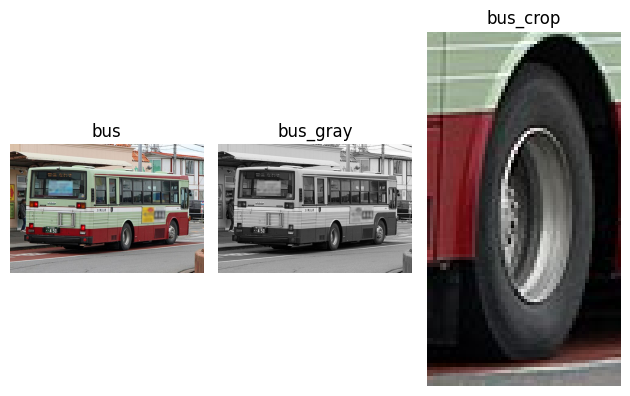

In [2]:
bus_gray = cv.cvtColor(bus, cv.COLOR_BGR2GRAY)
cv.imwrite('bus_gray.jpg', bus_gray)

bus_crop = bus[250:360, 350:410]
bus_crop_rgb = cv.cvtColor(bus_crop, cv.COLOR_BGR2RGB)      # To plot using matplotlib

plt.subplot(1,3,1)
plt.imshow(bus_rgb)
plt.title('bus')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(bus_gray, cmap='gray')
plt.title('bus_gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(bus_crop_rgb)
plt.title('bus_crop')
plt.axis('off')

plt.tight_layout()
plt.show()

## Problem 2: Image Smoothing

### 2D Convolution (Image Filtering)

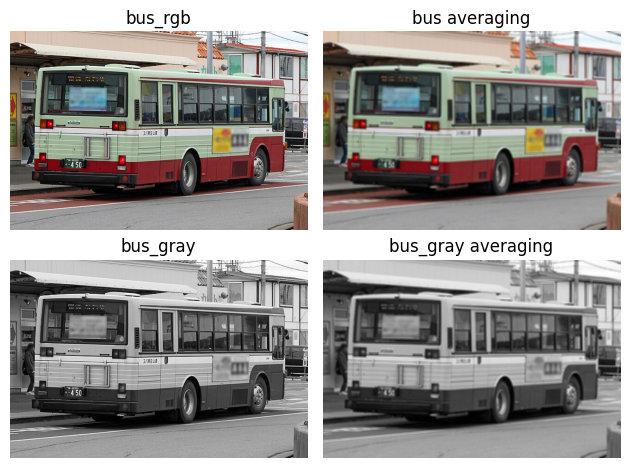

In [3]:
kernel = np.ones((5,5), np.float32) / 25        # mean filter
average = cv.filter2D(bus, -1, kernel)
average = cv.cvtColor(average, cv.COLOR_BGR2RGB)        # to plot using matplotlib
average_gray = cv.filter2D(bus_gray, -1, kernel)

plt.subplot(2,2,1)
plt.imshow(bus_rgb)
plt.title('bus_rgb')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(average)
plt.title('bus averaging')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(bus_gray, cmap='gray')
plt.title('bus_gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(average_gray, cmap='gray')
plt.title('bus_gray averaging')
plt.axis('off')

plt.tight_layout()
plt.show()

### Gaussian Blurring

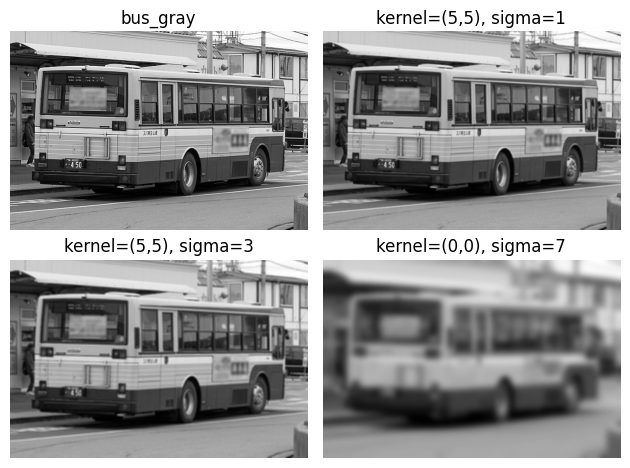

In [4]:
gau1 = cv.GaussianBlur(bus_gray, (5,5), 1)
gau2 = cv.GaussianBlur(bus_gray, (5,5), 3)
gau3 = cv.GaussianBlur(bus_gray, (0,0), 7)      # kernel size is dependent on sigma

gau_list = [bus_gray, gau1, gau2, gau3]
gau_titles = ['bus_gray', 'kernel=(5,5), sigma=1', 'kernel=(5,5), sigma=3', 'kernel=(0,0), sigma=7']

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(gau_list[i], cmap='gray')
    plt.title(gau_titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## Problem 3: Image Gradients

### Sobel

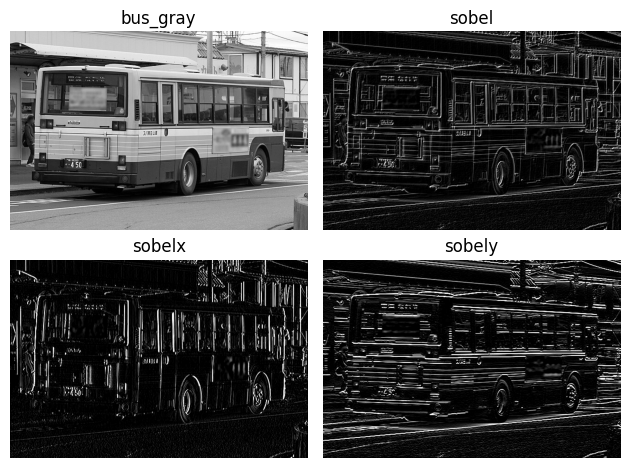

In [5]:
sobelx = cv.Sobel(bus_gray, -1, 1, 0, 3)        # input should be gray scale image
sobely = cv.Sobel(bus_gray, -1, 0, 1, 3)

abs_grad_x = cv.convertScaleAbs(sobelx)
abs_grad_y = cv.convertScaleAbs(sobely)
sobel = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

sobel_list = [bus_gray, sobel, sobelx, sobely]
sobel_titles = ['bus_gray', 'sobel', 'sobelx', 'sobely']

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(sobel_list[i], cmap='gray')
    plt.title(sobel_titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

### Canny

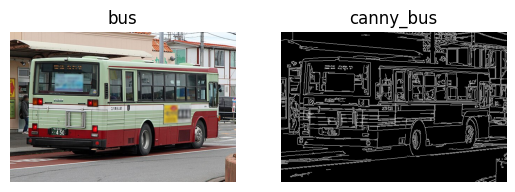

In [6]:
threshold1, threshold2 = 0, 450

canny_bus = cv.Canny(bus, threshold1, threshold2)
canny_bus_rgb = cv.cvtColor(canny_bus, cv.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(bus_rgb)
plt.title('bus')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(canny_bus_rgb)
plt.title('canny_bus')
plt.axis('off')

plt.show()

## Problem 4: Image Pyramid